##  I data exploration

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data_train.csv')

In [3]:
df


,id,label,review
0,2620,accueil / politesse,"mal accueillie, mal informée, et le vendeur ag..."
1,966,accueil / politesse,service affligeant. a fuir!
2,800,accueil / politesse,"personnel désagréable, agressif, pas à l'écout..."
3,1689,accueil / politesse,le personnel n'est vraiment pas orienté client...
4,1577,accueil / politesse,je n’ai pas pour habitude de donner mon avis s...
5,407,accueil / politesse,"très bonne accueil, et bien organisé. on s'occ..."
6,450,accueil / politesse,"accueil nul , amabilité et compétence proches ..."
7,479,accueil / politesse,accueil exécrable. si orange perd des clients ...
8,1835,accueil / politesse,bon accueil et bon service!
9,2050,accueil / politesse,accueil boutique sympa on vous prend en charge...


In [4]:
print('taille de df',df.shape)

taille de df (360, 3)


In [5]:
df.label.value_counts()

émotion                60
cadre / atmosphère     60
problème technique     60
relation commercial    60
accueil / politesse    60
temps d'attente        60
Name: label, dtype: int64

In [6]:
y = df.label
df.head()
x = df.drop('label', axis = 1)

In [7]:
x.head()

,id,review
0,2620,"mal accueillie, mal informée, et le vendeur ag..."
1,966,service affligeant. a fuir!
2,800,"personnel désagréable, agressif, pas à l'écout..."
3,1689,le personnel n'est vraiment pas orienté client...
4,1577,je n’ai pas pour habitude de donner mon avis s...


## II nettoyage

In [8]:
!pip install --user Unidecode

In [9]:
import re
import unidecode
global stop

from nltk.corpus import stopwords
sw1 = (stopwords.words('french'))
#from stop_words import get_stop_words
#sw2 = list(get_stop_words('fr'))

In [10]:
sw = set(sw1)

In [11]:
#normalisation Stop words: 1) enlever les accents
stop = []
for elem in sw : 
    stop.append(unidecode.unidecode(elem))



In [12]:
def nettoyage(text):
    l=[]
    #Normalisation: 1) Minuscule
    text = str(text).lower()
    #Normalisation : 2) Enlever les accents
    text = unidecode.unidecode(text)
    
    #Nettoyage : 3) Enlever les caracteres speciaux (chiffres, ponctuation,"&,@, ....")
    p=('([a-z]{1,})')
    text = ' '.join(re.findall(p,text.lower().replace('ç', 'c').replace('û', 'u').replace('\n', ' ' )))
    
    #Nettoyage du texte enlevant les stops words de celui ci
    for token in text.split():
        if token in stop:
            continue
        else:
            l.append(token)
            
    #Nettoyage du texte en enlevant les commentaires étrangers
    for token in text.split():
        
    
    
        
            
    #retourne texte nettoyé dans le format d'origine
        return ' '.join(l)

df.review =  df.review.apply(nettoyage)
    

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['review'])

In [14]:
df['review'].iloc[12]

'tres bon accueil'

In [15]:
#travail la matrice TFIDF pour la rendre intelligible et on la stocke dans df_f
df_f = pd.DataFrame(X.toarray())
df_f.columns = vectorizer.get_feature_names()


In [16]:
df_f

,abandonne,ability,abonnement,abonnements,abonner,abord,about,aboutir,absence,absolument,...,worst,would,wrong,yeux,you,your,youtube,yuro,yuroneun,zero
0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
5,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
6,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
7,0.157866,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
8,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
9,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [17]:
mot = []
a = []

for i in df_f.index: 
    tmp = df_f.loc[i]
    
    #nombre de mot à extraire
    nb =10
    
    while nb !=0:
        #ajouter cette condition car idmax prends les noms des colonnes par ordre alphabétique 
        #si le nombre de mots nb est superieur aux mots disponibles sur chaque ligne 
        if (tmp[tmp.idxmax(axis = 1)]) == 0.:
            a.append('')
        else:
            a.append(tmp.idxmax(axis = 1))
            del tmp[tmp.idxmax(axis = 1)]
        nb = nb-1
    mot.append(a)
    a=[]
    


    

In [18]:
df_f

,abandonne,ability,abonnement,abonnements,abonner,abord,about,aboutir,absence,absolument,...,worst,would,wrong,yeux,you,your,youtube,yuro,yuroneun,zero
0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
5,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
6,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
7,0.157866,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
8,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
9,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [19]:
!pip install --user wordcloud

In [29]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from os import path
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
?WordCloud

In [22]:
# Start with one review:
text = df.review[0]

In [23]:
print(text)

mal accueillie mal informee vendeur agace changerai forfait telephone si accueil changerai operateur


In [24]:
# Create and generate a word cloud image:
wordcloud = WordCloud(background_color= 'white').generate(text)

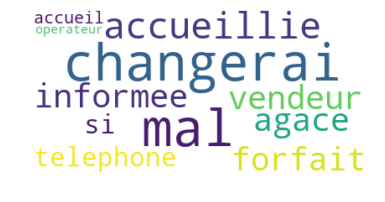

In [25]:
# Display the generated image:
plt.imshow(wordcloud, interpolation ='bilinear')
plt.axis("off")
plt.show()

In [26]:
text = " ".join(word for word in df.review)
print(f'Il y a {len(text)} mots dans tous les commentaires')

Il y a 49996 mots dans tous les commentaires


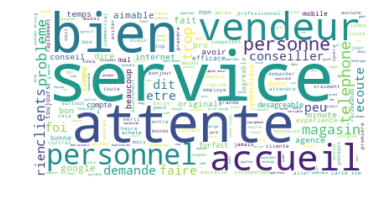

In [35]:
#create a list of stopword
stopwords = set(STOPWORDS)
stopwords.update(['boutique', 'tres', 'orange', 'plus','client', 'cette', 'chez','tout', 'chez', 'alors','ca', 'car', 'autre', 'si', 'quand', 'traduit', 'sans'])

#generate a word cloud image
wordcloud = WordCloud(stopwords= stopwords,background_color= 'white').generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()

In [36]:
#getting image mask
phone_mask = np.array(Image.open('smartphone.png'))
phone_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [37]:
#function that transform format of the image
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [38]:
# Transform the mask into a new one that will work with the function:
transformed_phone_mask = np.ndarray((phone_mask.shape[0],phone_mask.shape[1]), np.int32)
for i in range(len(phone_mask)):
    transformed_phone_mask[i] = list(map(transform_format, phone_mask[i]))

In [39]:
transformed_phone_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=int32)

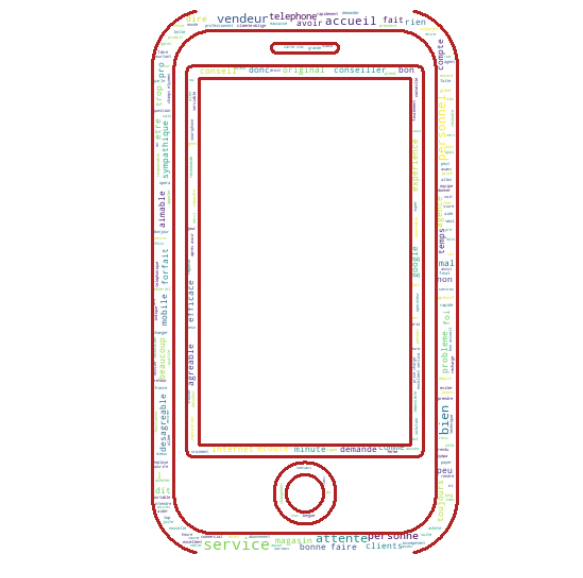

In [40]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words= 1000, mask = transformed_phone_mask, stopwords= stopwords, contour_width= 3,contour_color= 'firebrick')

#Genenerate a worldcloud
wc.generate(text)

#store to file
wc.to_file('orange.png')

#show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()
